## 单门课程成绩分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#%matplotlib inline
plt.rcdefaults()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['figure.figsize']=[9,6] #改变显示图形的大小

In [69]:
#KCH,KCMC,BFZCJ
#从本地数据文件中读取成绩数据
df_kccjb=pd.read_csv('data/xscjb20190213.csv',usecols=['KCH','KCMC','JG_ID','BFZCJ'],dtype={'JG_ID':np.object})
df_kccjb.head()

,JG_ID,KCMC,KCH,BFZCJ
0,1,中国近现代史纲要,A0010003,76
1,1,思想道德修养与法律基础,A0010004,81
2,1,大学信息技术(文管类),A0010026,79
3,1,教师口语,A0010044,85
4,1,汉字书写,A0010045,90


In [70]:
df_kccjb.info()   #查看字段类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907550 entries, 0 to 1907549
Data columns (total 4 columns):
JG_ID    object
KCMC     object
KCH      object
BFZCJ    int64
dtypes: int64(1), object(3)
memory usage: 58.2+ MB


### 数据预处理
1、JG_ID是字符串，如果1位，前面补0

In [78]:
df_kccjb.JG_ID=df_kccjb.JG_ID.apply(lambda x:str(x).zfill(2))
df_kccjb

,JG_ID,KCMC,KCH,BFZCJ
0,01,中国近现代史纲要,A0010003,76
1,01,思想道德修养与法律基础,A0010004,81
2,01,大学信息技术(文管类),A0010026,79
3,01,教师口语,A0010044,85
4,01,汉字书写,A0010045,90
5,01,大学英语（1）A,A001007a,75
6,01,教师书写技能,A0030002,85
7,01,入学教育,A0050001,91
8,01,军事理论与军事训练,A0050002,90
9,01,中国文化概论,A0120005,91


### 单门课程全部成绩分析

#### 数据预处理
1、统计每门课程的成绩人数

In [9]:
df_kccjb_group=df_kccjb.groupby(['KCMC','BFZCJ']).count()
df_kccjb_group
df_kccjb_group.reset_index(inplace=True)
df_kccjb_group

,KCMC,BFZCJ,KCH
0,美学,74,1
1,美学,78,2
2,美学,79,7
3,美学,80,17
4,美学,81,16
5,美学,82,13
6,美学,83,11
7,美学,84,10
8,美学,85,13
9,美学,86,10


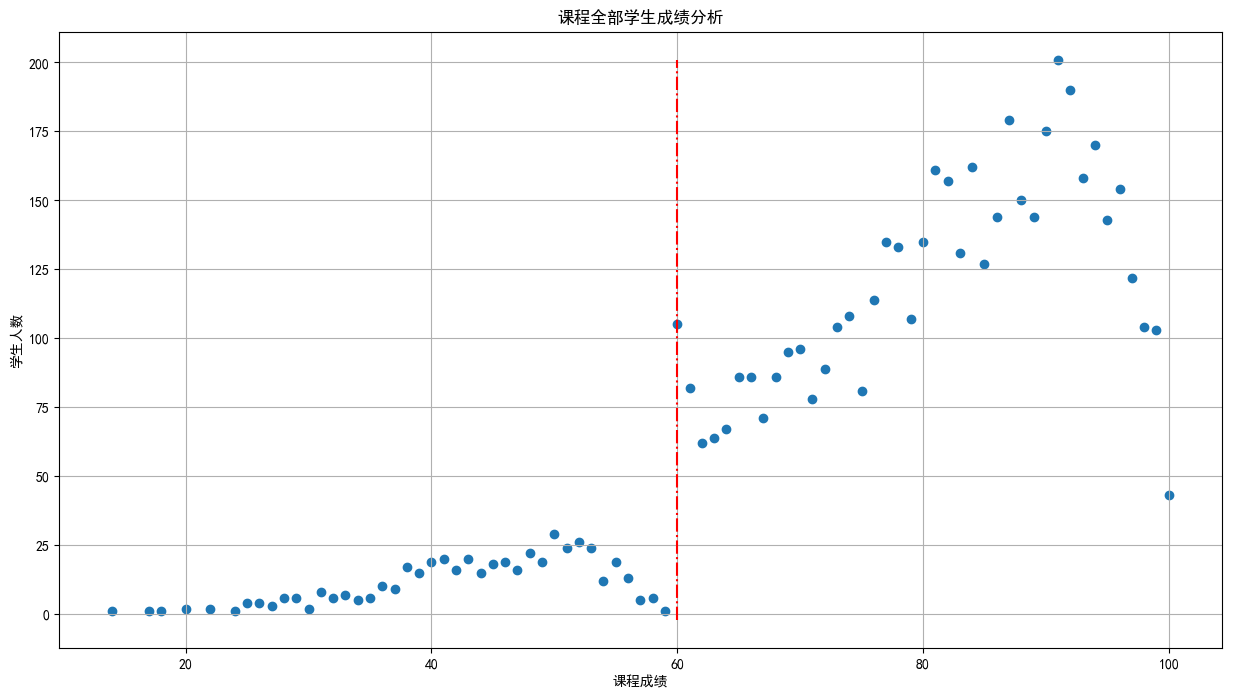

In [13]:
#指定课程
kcmc='高等数学B（1）'
df_kccjb_single=df_kccjb_group[df_kccjb_group.KCMC==kcmc]
count_max=df_kccjb_single.KCH.max()
count_max

#绘制图像    
point_size=80     #图像点的大小
plt.figure(figsize=[15,8])
plt.grid()

plt.scatter('BFZCJ','KCH',data=df_kccjb_single)
plt.plot([60,60],[-2,count_max],'r-.')

plt.title("课程全部学生成绩分析")
plt.xlabel('课程成绩')
plt.ylabel('学生人数')
pic_file_name='img/'+kcmc+'.png'
plt.savefig(pic_file_name)
plt.show()

### 单门课程成绩按学生学院分布分析

#### 数据预处理
1、统计每门课程的成绩人数

In [79]:
df_kccjb_jg_group=df_kccjb.groupby(['KCMC','JG_ID','BFZCJ']).count()
df_kccjb_jg_group.reset_index(inplace=True)
df_kccjb_jg_group

,KCMC,JG_ID,BFZCJ,KCH
0,美学,01,74,1
1,美学,01,78,2
2,美学,01,79,7
3,美学,01,80,17
4,美学,01,81,16
5,美学,01,82,13
6,美学,01,83,11
7,美学,01,84,10
8,美学,01,85,13
9,美学,01,86,10


<Figure size 900x600 with 0 Axes>

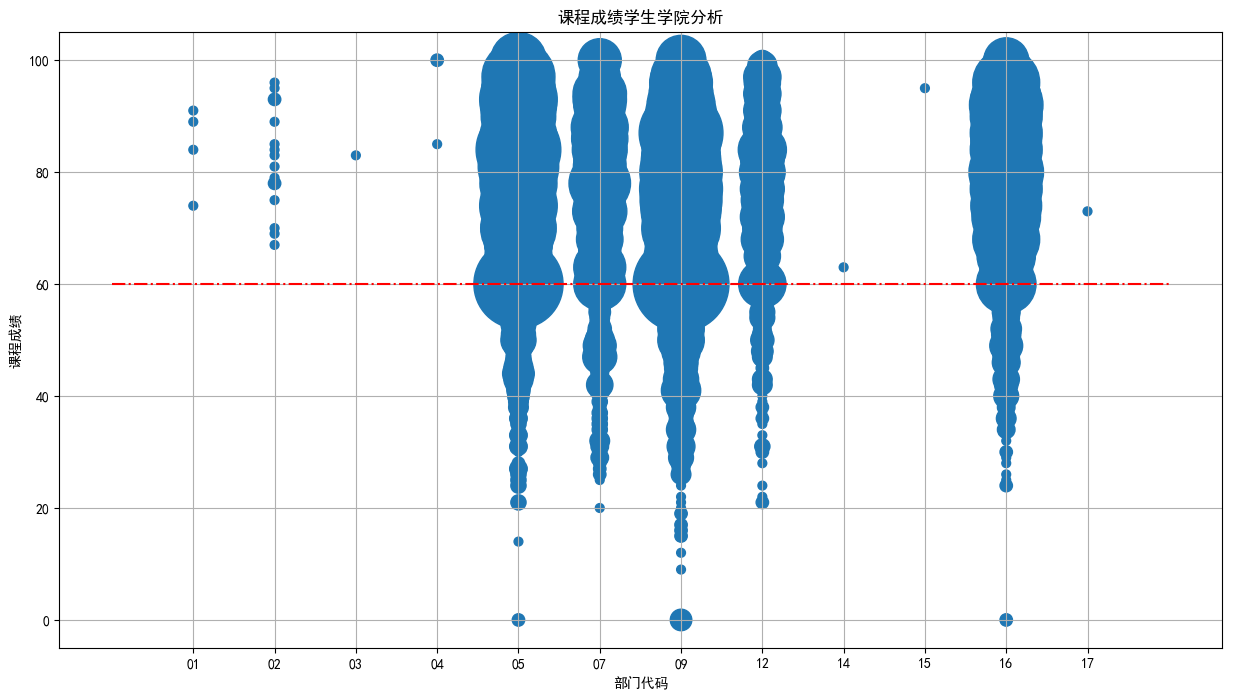

In [86]:
#精确指定课程名称
kcmc='高等数学A（1）'
df_kccjb_jg_single=df_kccjb_jg_group[df_kccjb_jg_group.KCMC==kcmc]
point_size=40     #图像点的大小
df_kccjb_jg_single.insert(0,'SCALE',df_kccjb_jg_single.KCH*point_size)  #按比例显示人数
jg_count_max=len(df_kccjb_jg_single.groupby('JG_ID').count())
#jg_count_max=df_kccjb_jg_single.JG_ID.max()
#df_kccjb_jg_single.groupby('JG_ID').count().index
#绘图
plt.figure(figsize=[15,8])
plt.grid()

plt.scatter('JG_ID','BFZCJ','SCALE',data=df_kccjb_jg_single)
plt.plot([-1,jg_count_max],[60,60],'r-.')

plt.title("课程成绩学生学院分析")
plt.xlabel('部门代码')
plt.ylabel('课程成绩')
#plt.yticks(np.arange(0,120,5))
plt.xticks(range(jg_count_max),df_kccjb_jg_single.groupby('JG_ID').count().index)

plt.show()
pic_file_name='img/'+kcmc+'学生学院.png'
plt.savefig(pic_file_name)

In [95]:
#模糊指定课程名称
kcmc='大学英语'
df_kccjb_jg_single=df_kccjb_jg_group[df_kccjb_jg_group.KCMC.str.contains(kcmc)]
df_kccjb_jg_single
df_kccjb_jg_single[df_kccjb_jg_single.JG_ID=='03']

,KCMC,JG_ID,BFZCJ,KCH
80443,大学英语（1）A,03,81,1
80444,大学英语（1）A,03,90,1
80868,大学英语（1）B,03,75,1
81900,大学英语（2）A,03,72,1
81901,大学英语（2）A,03,76,2
81902,大学英语（2）A,03,79,1
81903,大学英语（2）A,03,81,1
81904,大学英语（2）A,03,82,1
81905,大学英语（2）A,03,90,1
81906,大学英语（2）A,03,93,1


<Figure size 900x600 with 0 Axes>

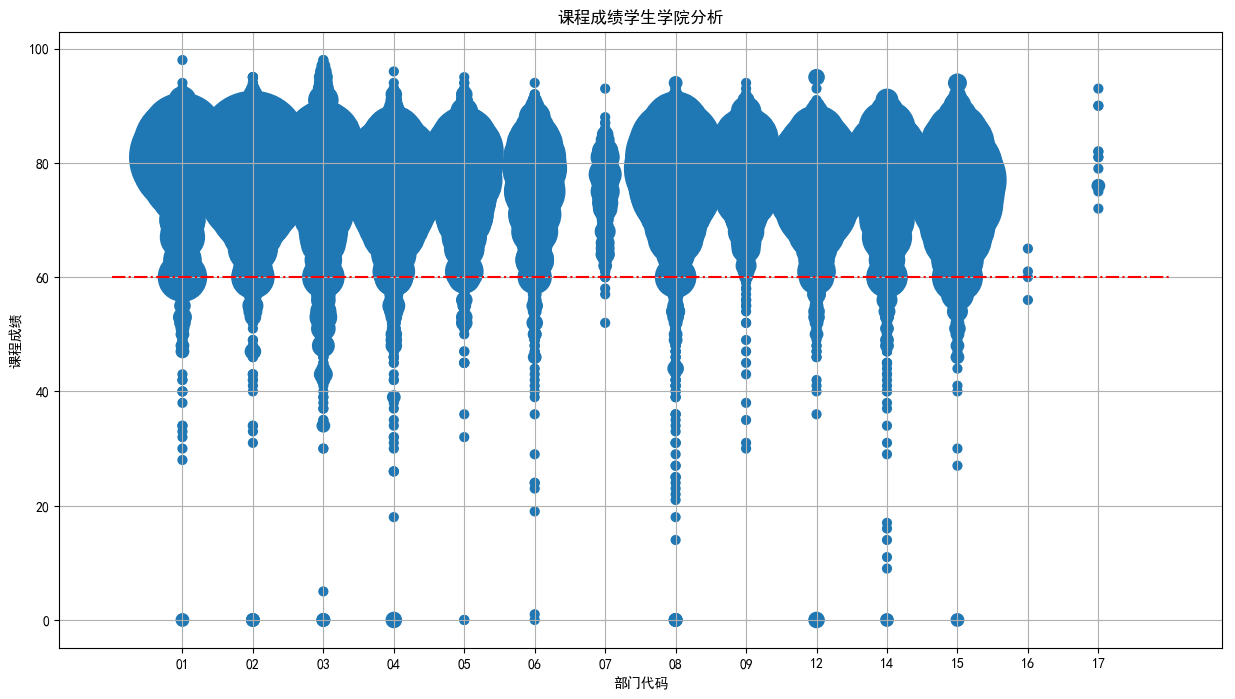

In [93]:
point_size=40     #图像点的大小
df_kccjb_jg_single.insert(0,'SCALE',df_kccjb_jg_single.KCH*point_size)  #按比例显示人数
jg_count_max=len(df_kccjb_jg_single.groupby('JG_ID').count())


#绘图
plt.figure(figsize=[15,8])
plt.grid()

plt.scatter('JG_ID','BFZCJ','SCALE',data=df_kccjb_jg_single)
plt.plot([-1,jg_count_max],[60,60],'r-.')

plt.title("课程成绩学生学院分析")
plt.xlabel('部门代码')
plt.ylabel('课程成绩')
#plt.yticks(np.arange(0,120,5))
plt.xticks(range(jg_count_max),df_kccjb_jg_single.groupby('JG_ID').count().index)

plt.show()
pic_file_name='img/'+kcmc+'学生学院.png'
plt.savefig(pic_file_name)